In [1]:
#https://medium.com/analytics-vidhya/build-your-own-technical-analysis-stock-screener-using-python-5d1bb3d091f0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filepath = 'C:/Users/Wai/OneDrive/Desktop/Stocks-Demo/'
pd.set_option("display.precision",4)
#df = pd.read_csv("stocks_rets.csv")
df = pd.read_csv(filepath + 'klse_stocks_v3.csv')#.set_index('Date')
df2 = pd.read_csv(filepath + 'klse.csv')
%matplotlib inline

In [2]:
df.tail(5)

Date      ^KLSE  1015.KL  1023.KL  1066.KL  1082.KL  1155.KL  \
168  2022-09-09  1496.5300     4.06     5.44     5.76    19.30     8.97   
169  2022-09-12  1497.9600     4.08     5.47     5.79    19.42     8.99   
170  2022-09-13  1487.8400     4.11     5.45     5.75    19.28     8.92   
171  2022-09-14  1468.4399     4.05     5.39     5.69    18.96     8.85   
172  2022-09-15  1467.3101     4.10     5.37     5.68    18.82     8.86   

     1171.KL  1295.KL  1562.KL  ...  7084.KL  7106.KL  7113.KL  7153.KL  \
168    0.600   4.6102     1.84  ...     5.06    0.750    0.795     1.02   
169    0.605   4.6200     1.85  ...     5.05    0.765    0.820     1.05   
170    0.605   4.5200     1.83  ...     5.05    0.755    0.805     1.02   
171    0.605   4.4400     1.83  ...     5.07    0.760    0.785     1.05   
172    0.605   4.4700     1.94  ...     5.13    0.730    0.765     1.01   

     7277.KL  7293.KL  8583.KL  8664.KL  9059.KL  9679.KL  
168     2.23     2.27   0.6029    0.720     1.03    0.445  
169     2.26     2.28   0.6029    0.705     1.02    0.450  
170     2.29     2.29   0.5933    0.700     1.01    0.440  
171     2.20     2.29   0.5885    0.680     1.03    0.445  
172     2.29     2.30   0.5800    0.700     1.01    0.445  

[5 rows x 92 columns]

In [3]:
df1 = df[['Date','1295.KL','5200.KL', '5209.KL', '4863.KL','5819.KL']]
df1.tail()

Date  1295.KL  5200.KL  5209.KL  4863.KL  5819.KL
168  2022-09-09   4.6102     1.72     3.50     5.81    20.88
169  2022-09-12   4.6200     1.73     3.53     5.79    21.06
170  2022-09-13   4.5200     1.72     3.50     5.84    20.94
171  2022-09-14   4.4400     1.72     3.49     5.80    20.70
172  2022-09-15   4.4700     1.74     3.53     5.76    20.70

In [4]:
df1 = df1.set_index('Date')
df1.head()

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL
Date                                                   
2022-01-03   4.0099   1.5882   2.5236   5.4513  18.5937
2022-01-04   3.9905   1.5787   2.5714   5.4019  18.7919
2022-01-05   4.0292   1.5977   2.5619   5.4217  18.9505
2022-01-06   3.9809   1.5882   2.5619   5.3427  18.9306
2022-01-07   4.0195   1.5882   2.5714   5.2735  18.9505

In [5]:
for i in df1.columns:
    #x = df1.columns[i]
    for j in range(df2.shape[0]):
        if i == df2.code1.iloc[j]:
            print(df2.name.iloc[j])
            break

PUBLIC BANK BERHAD
UOA DEVELOPMENT BHD
GAS MALAYSIA BERHAD
TELEKOM MALAYSIA BERHAD
HONG LEONG BANK BERHAD


In [6]:
#stocks_list = ['HWM', 'AKAM', 'ABT', 'SPDN']
w = [0.1479, 0.141,0.2631, 0.1834,0.2643]
#w =[0.2421, 0.2763, 0.1608, 0.159, 0.1615]
sum(w)

0.9997

In [7]:
k = 0
windows = 10#20
window_size = df1.shape[0]
windows_forward = window_size - windows

import numpy as np
p = []
for j in range(windows_forward):
    
    prices1 = df1.iloc[k:windows,].mean()
    port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
    k = k+1
    windows = windows + 1
    p.append(port_price)
    

In [8]:
window_size = df1.shape[0]

pp = pd.DataFrame()
pp = pd.DataFrame()
win = [10,20,30,40]
for i in win:
    p = []
    k = 0
    windows = i
    windows_forward = window_size - i
    
    for j in range(windows_forward):
    
        prices1 = df1.iloc[k:windows,].mean()
        port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
        k = k+1
        windows = windows + 1
        p.append(port_price)
    p1 = pd.DataFrame(p)
    pp = pd.concat([pp,p1],axis =1)

<AxesSubplot:>

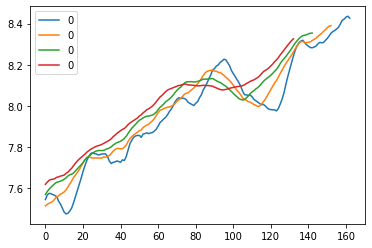

In [9]:
pp.plot()

In [10]:
# print(pp.iloc[:,0].mean()/pp.iloc[:,0].std())
# print(pp.iloc[:,1].mean()/pp.iloc[:,1].std())
# print(pp.iloc[:,2].mean()/pp.iloc[:,2].std())
# print(pp.iloc[:,3].mean()/pp.iloc[:,3].std())
# print(pp.iloc[:,4].mean()/pp.iloc[:,4].std())

In [11]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # plt.xlim(0,140)
# # plt.ylim(80,115)
# # pp.plot(figsize=(15,15),subplots=True,grid=True)

# pp.plot(figsize=(15,15),subplots=True,xlim=(0,360),ylim=(4,7),grid=True)


<AxesSubplot:>

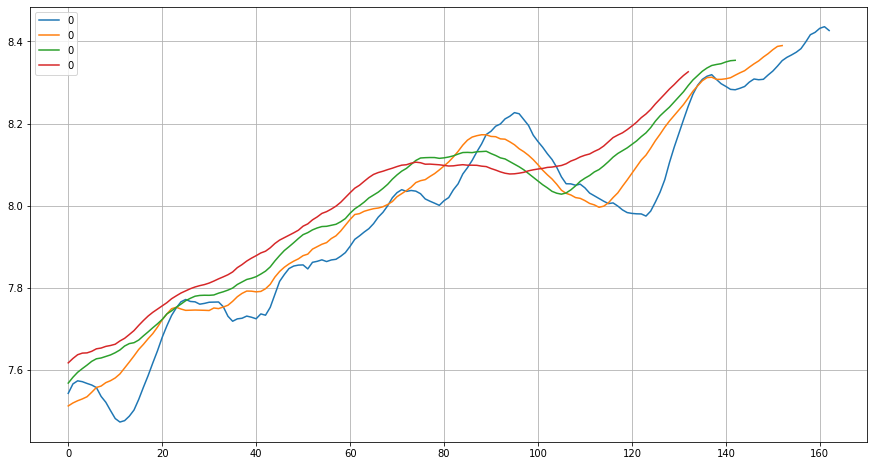

In [12]:
prices = pd.DataFrame(pp)
prices.plot(figsize=(15,8),grid=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

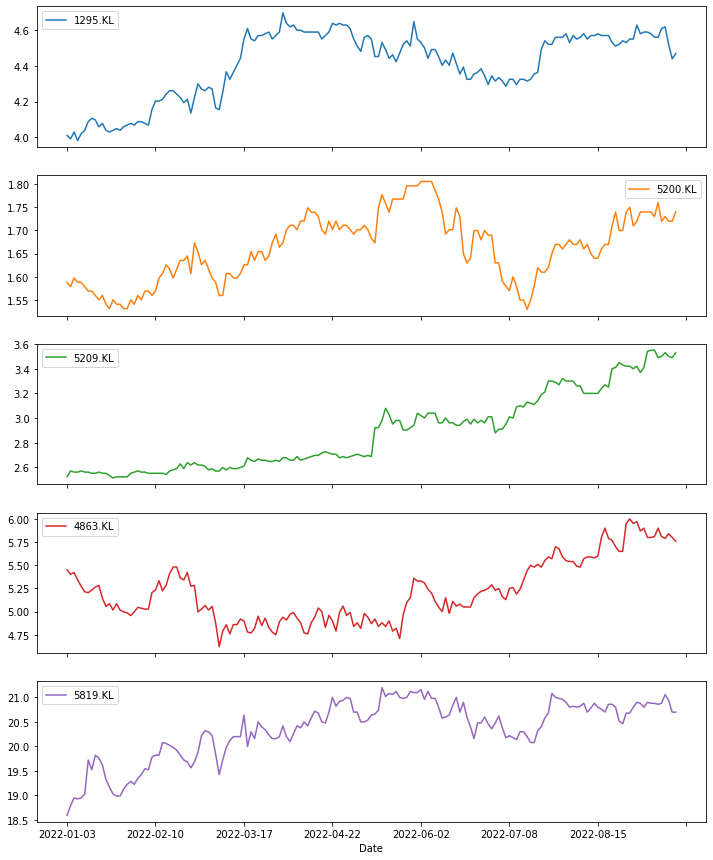

In [13]:
df1.plot(figsize=(12,15),subplots=True)

In [14]:
l = df1.shape[1]
l

5

In [15]:
for i in df1.columns:
    df1['{}_avg'.format(i)] = df1[i].rolling(window=24).mean()

In [16]:
df1.head()

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL  1295.KL_avg  \
Date                                                                   
2022-01-03   4.0099   1.5882   2.5236   5.4513  18.5937          NaN   
2022-01-04   3.9905   1.5787   2.5714   5.4019  18.7919          NaN   
2022-01-05   4.0292   1.5977   2.5619   5.4217  18.9505          NaN   
2022-01-06   3.9809   1.5882   2.5619   5.3427  18.9306          NaN   
2022-01-07   4.0195   1.5882   2.5714   5.2735  18.9505          NaN   

            5200.KL_avg  5209.KL_avg  4863.KL_avg  5819.KL_avg  
Date                                                            
2022-01-03          NaN          NaN          NaN          NaN  
2022-01-04          NaN          NaN          NaN          NaN  
2022-01-05          NaN          NaN          NaN          NaN  
2022-01-06          NaN          NaN          NaN          NaN  
2022-01-07          NaN          NaN          NaN          NaN

In [17]:
df1 = df1.dropna()

In [18]:
df1['raw'] = df1.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)

<ipython-input-18-b2f1ee006aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raw'] = df1.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)


In [19]:
# a = df['^KLSE'].values
# b = df1.raw.values
# np.corrcoef(a,b)[0, 1]

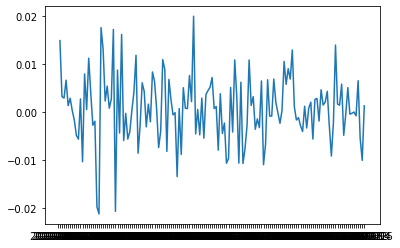

In [20]:
#plt.plot(df['^KLSE'])
plt.plot(df1.raw.pct_change())

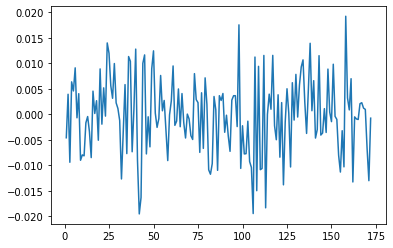

In [21]:
plt.plot(df['^KLSE'].pct_change())

In [22]:
df1.head()

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL  1295.KL_avg  \
Date                                                                   
2022-02-08   4.0678   1.5693   2.5523   5.0266  19.5253       4.0533   
2022-02-09   4.1548   1.5598   2.5523   5.2044  19.7830       4.0594   
2022-02-10   4.2031   1.5693   2.5523   5.2340  19.8227       4.0682   
2022-02-11   4.2031   1.5977   2.5523   5.3328  19.8227       4.0755   
2022-02-14   4.2128   1.6071   2.5523   5.2241  20.0804       4.0852   

            5200.KL_avg  5209.KL_avg  4863.KL_avg  5819.KL_avg     raw  
Date                                                                    
2022-02-08       1.5598       2.5495       5.1488      19.2470  7.5768  
2022-02-09       1.5587       2.5507       5.1386      19.2965  7.6891  
2022-02-10       1.5583       2.5499       5.1316      19.3395  7.7135  
2022-02-11       1.5583       2.5495       5.1279      19.3758  7.7356  
2022-02-14       1.5590       2.5491       5.1229      19.4237  7.7865

In [23]:
ll = l+l
ll

10

In [24]:
df1['avg'] = df1.iloc[:,l:ll].apply(lambda x: np.sum(x * w),axis=1)
df1.head()

<ipython-input-24-6c514d1b77ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg'] = df1.iloc[:,l:ll].apply(lambda x: np.sum(x * w),axis=1)


1295.KL  5200.KL  5209.KL  4863.KL  5819.KL  1295.KL_avg  \
Date                                                                   
2022-02-08   4.0678   1.5693   2.5523   5.0266  19.5253       4.0533   
2022-02-09   4.1548   1.5598   2.5523   5.2044  19.7830       4.0594   
2022-02-10   4.2031   1.5693   2.5523   5.2340  19.8227       4.0682   
2022-02-11   4.2031   1.5977   2.5523   5.3328  19.8227       4.0755   
2022-02-14   4.2128   1.6071   2.5523   5.2241  20.0804       4.0852   

            5200.KL_avg  5209.KL_avg  4863.KL_avg  5819.KL_avg     raw     avg  
Date                                                                            
2022-02-08       1.5598       2.5495       5.1488      19.2470  7.5768  7.5215  
2022-02-09       1.5587       2.5507       5.1386      19.2965  7.6891  7.5337  
2022-02-10       1.5583       2.5499       5.1316      19.3395  7.7135  7.5448  
2022-02-11       1.5583       2.5495       5.1279      19.3758  7.7356  7.5547  
2022-02-14       1.5590       2.5491       5.1229      19.4237  7.7865  7.5679

In [25]:
df1['raw_chg'] = df1['raw'].pct_change(1)
df1['avg_chg'] = df1['avg'].pct_change(1)

<ipython-input-25-5d67fbba4414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raw_chg'] = df1['raw'].pct_change(1)
<ipython-input-25-5d67fbba4414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_chg'] = df1['avg'].pct_change(1)


<AxesSubplot:xlabel='Date'>

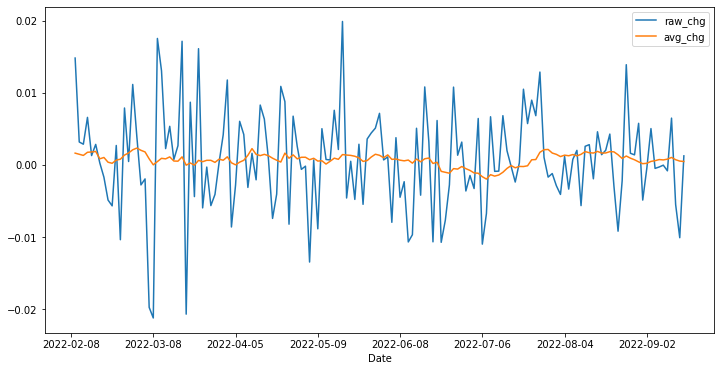

In [26]:
df1[['raw_chg','avg_chg']].plot(figsize=(12,6))

<ipython-input-27-711b6147e826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raw_cum'] = df1['raw_chg'].cumsum()
<ipython-input-27-711b6147e826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_cum'] = df1['avg_chg'].cumsum()


<AxesSubplot:xlabel='Date'>

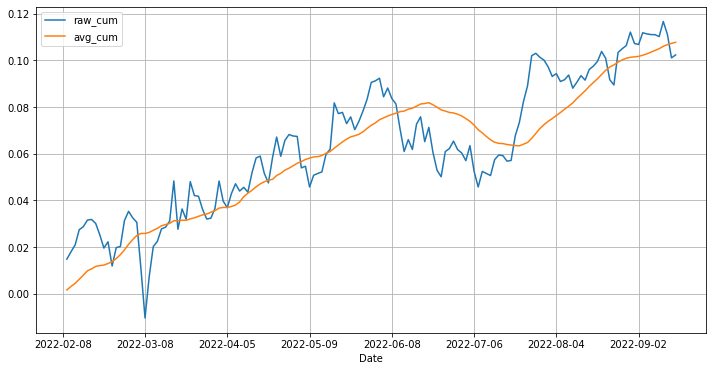

In [27]:
df1['raw_cum'] = df1['raw_chg'].cumsum()
df1['avg_cum'] = df1['avg_chg'].cumsum()
df1[['raw_cum','avg_cum']].plot(figsize=(12,6),grid=True)

<AxesSubplot:xlabel='Date'>

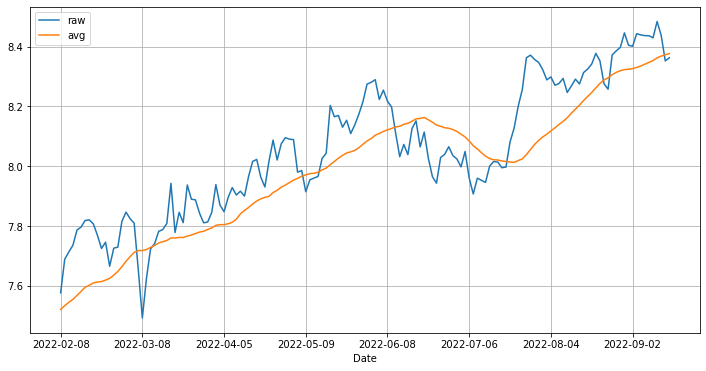

In [28]:
df1[['raw','avg']].plot(figsize=(12,6),grid=True)

<AxesSubplot:>

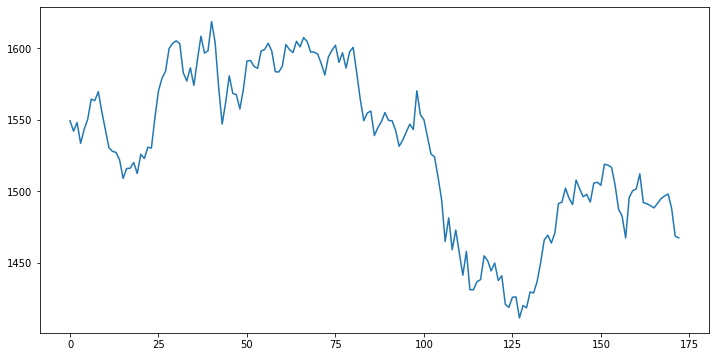

In [29]:
# df3 = pd.read_csv(filepath + 'klse_stocks.csv')
# df3 = df3.set_index('Date')
# df3['^KLSE'].loc['09/02/2021':'2022/09/02'].plot(figsize=(12,6))
df['^KLSE'].plot(figsize=(12,6))

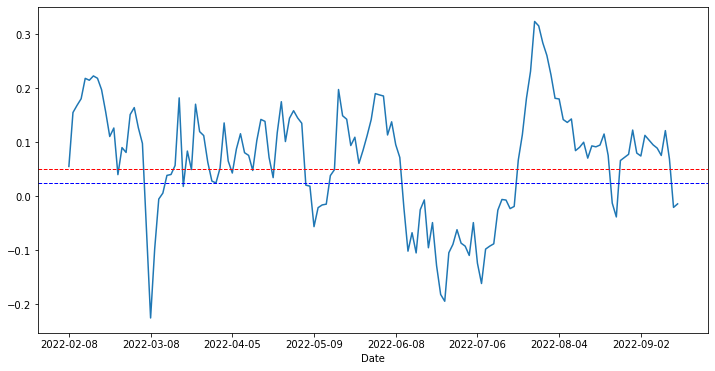

In [30]:
df1['Buy'] = df1.raw-df1.avg 
ax = df1['Buy'].plot(figsize=(12,6))
ax.axhline(y=0.05,color='r', linestyle='--', lw=1)
ax.axhline(y=0.025,color='b', linestyle='--', lw=1)

In [31]:
df1[['raw','avg','Buy']].tail(20)

raw     avg     Buy
Date                              
2022-08-18  8.3418  8.2467  0.0950
2022-08-19  8.3774  8.2619  0.1155
2022-08-22  8.3526  8.2768  0.0759
2022-08-23  8.2758  8.2884 -0.0126
2022-08-24  8.2576  8.2957 -0.0382
2022-08-25  8.3723  8.3059  0.0664
2022-08-26  8.3858  8.3137  0.0721
2022-08-29  8.3974  8.3195  0.0779
2022-08-30  8.4458  8.3230  0.1228
2022-09-01  8.4046  8.3244  0.0802
2022-09-02  8.4009  8.3262  0.0747
2022-09-05  8.4432  8.3302  0.1130
2022-09-06  8.4391  8.3351  0.1041
2022-09-07  8.4366  8.3412  0.0954
2022-09-08  8.4363  8.3470  0.0893
2022-09-09  8.4294  8.3536  0.0758
2022-09-12  8.4840  8.3622  0.1218
2022-09-13  8.4374  8.3682  0.0692
2022-09-14  8.3521  8.3726 -0.0205
2022-09-15  8.3626  8.3766 -0.0140

In [32]:
df1['Buy'].loc[df1.Buy>0].describe()

count    110.0000
mean       0.1175
std        0.0634
min        0.0060
25%        0.0728
50%        0.1102
75%        0.1510
max        0.3240
Name: Buy, dtype: float64

In [33]:
df1['Buy'].loc[df1.Buy<0].describe()

count    40.0000
mean     -0.0698
std       0.0562
min      -0.2253
25%      -0.0987
50%      -0.0623
75%      -0.0208
max      -0.0050
Name: Buy, dtype: float64

In [35]:
profit = (df1['raw'].iloc[-1]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
print('% profit: ',profit*100)

% profit:  10.370319247907329


In [36]:
(10.37/df1.shape[0])*252

17.421599999999998

In [36]:
# profit = (df1['raw'].iloc[252]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
# print('% profit: ',profit*100)

In [37]:
cap = 20000
w1 = [val * cap for val in w]
w1

[2958.0, 2819.9999999999995, 5262.0, 3668.0, 5286.0]

In [38]:
df1.iloc[-1,:l]

1295.KL     4.47
5200.KL     1.74
5209.KL     3.53
4863.KL     5.76
5819.KL    20.70
Name: 2022-09-15, dtype: float64

In [39]:
w1/df1.iloc[-1,:l]

1295.KL     661.7450
5200.KL    1620.6896
5209.KL    1490.6516
4863.KL     636.8055
5819.KL     255.3623
Name: 2022-09-15, dtype: float64

### Max Draw Down

In [40]:
Roll_Max = df1['raw'].cummax()
Daily_Drawdown =  df1['raw']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Raw Max DD: ',Max_Daily_Drawdown)

Raw Max DD:  Date
2021-10-05    0.0000
2021-10-06    0.0000
2021-10-07   -0.0083
2021-10-08   -0.0138
2021-10-11   -0.0154
               ...  
2022-09-09   -0.0494
2022-09-12   -0.0494
2022-09-13   -0.0494
2022-09-14   -0.0494
2022-09-15   -0.0494
Name: raw, Length: 235, dtype: float64


In [41]:
Roll_Max = df1['avg'].cummax()
Daily_Drawdown =  df1['avg']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Avg Max DD: ',Max_Daily_Drawdown)

Avg Max DD:  Date
2021-10-05    0.0000
2021-10-06    0.0000
2021-10-07   -0.0006
2021-10-08   -0.0012
2021-10-11   -0.0018
               ...  
2022-09-09   -0.0235
2022-09-12   -0.0235
2022-09-13   -0.0235
2022-09-14   -0.0235
2022-09-15   -0.0235
Name: avg, Length: 235, dtype: float64


In [191]:
df1['Cumulative'] = df1.raw_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['raw_dd'] = df1['Cumulative'] - df1['HighValue']

df1['Cumulative'] = df1.avg_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['avg_dd'] = df1['Cumulative'] - df1['HighValue']

<AxesSubplot:xlabel='Date'>

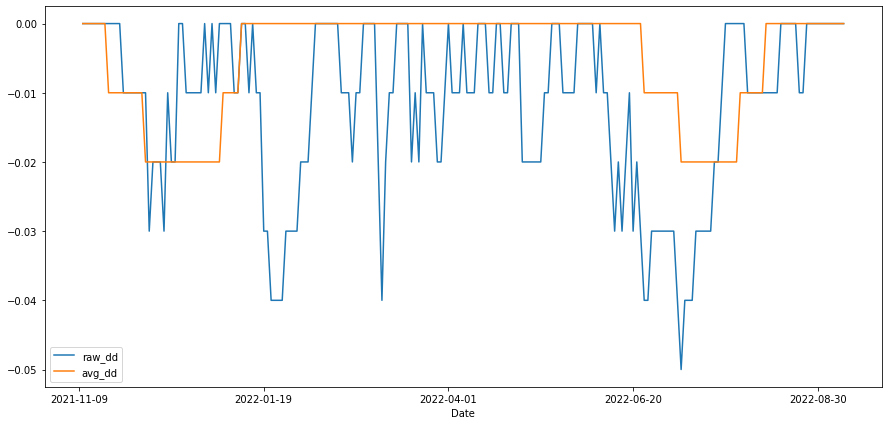

In [192]:
df1[['raw_dd','avg_dd']].plot(figsize=(15,7))

In [193]:
df1['shifted_price'] = df1.raw.shift()

In [194]:
cond = [df1.raw - df1.avg > 0.119, df1.raw - df1.avg < -0.103]
choices = ['Buy','Sell']
df1['Signal'] = np.select(cond,choices)

In [195]:
df1['Signal'].value_counts()

0       134
Buy      60
Sell     14
Name: Signal, dtype: int64

In [196]:
df1.Signal = df1.Signal.shift() # shift 1 day forward so buy today after getting signal yesterday

In [197]:
#https://klse.i3investor.com/web/hti/brokers
fees = 0.004
position = False
buydates,selldates = [],[]
buyprices,sellprices = [],[]
for index,row in df1.iterrows():
    if not position and row['Signal'] == 'Buy':
        buydates.append(index)
        buyprice1 = row.raw + (row.raw*fees)
        #buyprice1 = row.shifted_price + (row.shifted_price*fees)
        print('Buy ',buyprice1)
         #print(buyprices)
        #buyprices.append(row.raw)
        buyprices.append(buyprice1)
        position = True
        
    if position:
        if row['Signal'] == 'Sell' or row.shifted_price < 0.5 * buyprices[-1]:
            selldates.append(index)
            sellprice1 = row.raw - (row.raw*fees)
            #sellprice1 = row.shifted_price - (row.shifted_price*fees)
            print('Sell ',sellprice1)
            sellprices.append(sellprice1)
            position = False
        

Buy  7.306878443103982
Sell  7.6043998739810945
Buy  7.821280047650623
Sell  8.104631577799989
Buy  8.300991762995146


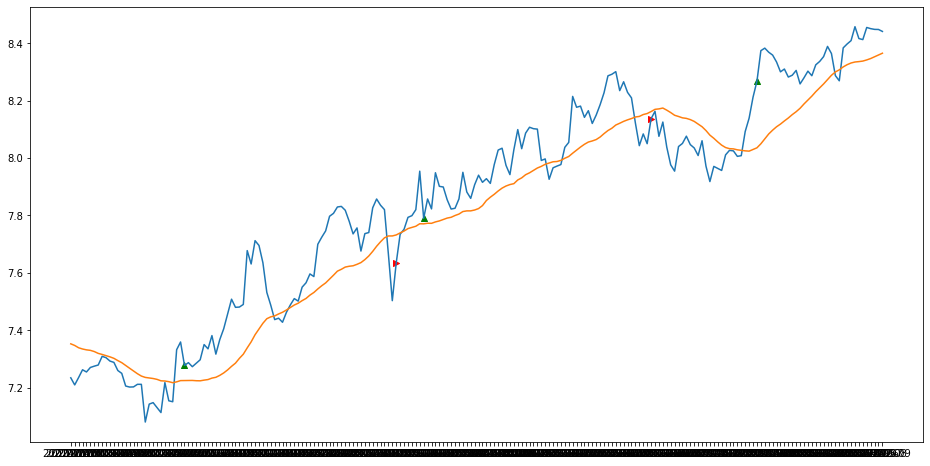

In [198]:
plt.figure(figsize=(16,8))
plt.plot(df1.raw)
plt.plot(df1.avg)

plt.scatter(df1.loc[buydates].index,df1.loc[buydates].raw,marker='^',color='g')
plt.scatter(df1.loc[selldates].index,df1.loc[selldates].raw,marker='>',color='r')

In [200]:
pd.DataFrame(sellprices,buyprices)

ValueError: Shape of passed values is (2, 1), indices imply (3, 1)

In [201]:
buyprices

[7.306878443103982, 7.821280047650623, 8.300991762995146]

In [199]:
(pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod()

1.0784214175241176